## image_AD2

In [8]:
library(tidyverse)
library(data.table)

In [9]:
AD_top_loci = fread("/home/ubuntu/data/analysis_result/twas/AD/export/summary/FunGen_twas.exported.bed.gz") |> select(-TADB_start,-TADB_end) |> select(`#chr`, molecular_id, start, end, everything()) |> rename(chr = `#chr`)
head(AD_top_loci)

chr,molecular_id,start,end,context,gwas_study,method,is_imputable,is_selected_method,rsq_cv,pval_cv,twas_z,twas_pval,type,block
<int>,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<lgl>,<lgl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
1,ENSG00000187634,923921,923922,AC_DeJager_eQTL,Bellenguez_2022,bayes_l,TRUE,FALSE,0.06358278,4.713139e-10,-0.5516557,0.5811842,eQTL,chr1_16103_2888443
1,ENSG00000187634,923921,923922,AC_DeJager_eQTL,Bellenguez_2022,bayes_r,TRUE,TRUE,0.09006772,8.293727e-14,-0.6079598,0.5432142,eQTL,chr1_16103_2888443
1,ENSG00000187634,923921,923922,AC_DeJager_eQTL,Bellenguez_2022,enet,TRUE,FALSE,0.07363354,1.811244e-11,-0.8264034,0.4085753,eQTL,chr1_16103_2888443
1,ENSG00000187634,923921,923922,AC_DeJager_eQTL,Bellenguez_2022,lasso,TRUE,FALSE,0.07175097,3.341192e-11,-0.7787284,0.4361397,eQTL,chr1_16103_2888443
1,ENSG00000187634,923921,923922,AC_DeJager_eQTL,Bellenguez_2022,mrash,TRUE,FALSE,0.08157779,1.353045e-12,-0.1803822,0.8568525,eQTL,chr1_16103_2888443
1,ENSG00000187634,923921,923922,AC_DeJager_eQTL,Bellenguez_2022,mrmash,TRUE,FALSE,0.07746210,5.199122e-12,-1.4978502,0.1341722,eQTL,chr1_16103_2888443


In [10]:
TL1_top_loci = fread("~/project/image_QTL/twas/TL1_twas_merged.tsv.gz.combined_twas.tsv.gz") 
AD1_top_loci = fread("~/project/image_QTL/twas/image_AD1_twas_merged.tsv.gz.combined_twas.tsv.gz")
AD2_top_loci = fread("~/project/image_QTL/twas/image_AD2_twas_merged.tsv.gz.combined_twas.tsv.gz")
Aging1_top_loci = fread("~/project/image_QTL/twas/image_Aging1_twas_merged.tsv.gz.combined_twas.tsv.gz")
Aging2_top_loci = fread("~/project/image_QTL/twas/image_Aging2_twas_merged.tsv.gz.combined_twas.tsv.gz")
Aging3_top_loci = fread("~/project/image_QTL/twas/image_Aging3_twas_merged.tsv.gz.combined_twas.tsv.gz")
Aging4_top_loci = fread("~/project/image_QTL/twas/image_Aging4_twas_merged.tsv.gz.combined_twas.tsv.gz")
Aging5_top_loci = fread("~/project/image_QTL/twas/image_Aging5_twas_merged.tsv.gz.combined_twas.tsv.gz")

all = rbind(TL1_top_loci, AD1_top_loci, AD2_top_loci, Aging1_top_loci, Aging2_top_loci, Aging3_top_loci, Aging4_top_loci, Aging5_top_loci)

In [11]:
# TL1_top_loci |> filter(str_detect(molecular_id, "ENSG00000088727"))

In [12]:
all = all |> select(-TSS, -region,-study_context,-source_file)
all = rbind(all, AD_top_loci) |> unique()

In [13]:
dim(all)

[1] 19592064       15

In [14]:
annotated_gene_names = fread("~/xqtl-analysis/production/image_QTL/interested_genes/TWAS_QTL/TWAS_QTL_gene_list.tsv")
head(annotated_gene_names)

#chr,start,end,gene_id,source,gene_name,event_id
<chr>,<int>,<int>,<chr>,<chr>,<chr>,<chr>
chr14,99238297,101760000,ENSG00000100811,TWAS,YY1,image_AD1
chr20,34433347,37080000,ENSG00000125965,TWAS,GDF5,image_AD1
chr3,46413681,50320000,ENSG00000114650,TWAS,SCAP,image_AD1
chr8,9840000,12600000,ENSG00000104643,TWAS,MTMR9,image_AD1
chr10,101673731,103714397,ENSG00000138175,TWAS,ARL3,image_AD1
chr10,101644478,103680000,ENSG00000171206,TWAS,TRIM8,image_AD1


In [15]:

# Step 2: Keep only unique gene_id (keep first occurrence)
lookup_table <- annotated_gene_names %>%
  select(gene_id, gene_name) %>%
  distinct(gene_id, .keep_all = TRUE)

# Step 3: Annotate df_c using the lookup table
annotated_all <- all %>%
  left_join(lookup_table, by = c("molecular_id"="gene_id")) %>% select(chr, molecular_id, gene_name, context, gwas_study, twas_z, twas_pval, everything())


In [16]:
# supp = fread("~/xqtl-analysis/production/image_QTL/interested_genes/TWAS_QTL/manually_annotated_all.tsv")
# annotated_all = bind_rows(annotated_all, supp) |> unique()

In [17]:
head(annotated_all)
dim(annotated_all)

chr,molecular_id,gene_name,context,gwas_study,twas_z,twas_pval,start,end,method,is_imputable,is_selected_method,rsq_cv,pval_cv,type,block
<int>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<int>,<int>,<chr>,<lgl>,<lgl>,<dbl>,<dbl>,<chr>,<chr>
10,ENSG00000055950,NA,Knight_eQTL_brain,Telomere_pc1,-2.903662,0.003688264,99320000,102120000,enet,TRUE,FALSE,0.098757440,8.923911e-10,eQTL,chr10_100331627_104378781
10,ENSG00000055950,NA,Knight_eQTL_brain,Telomere_pc1,-2.878534,0.003995280,99320000,102120000,lasso,TRUE,FALSE,0.103370596,3.541036e-10,eQTL,chr10_100331627_104378781
10,ENSG00000055950,NA,Knight_eQTL_brain,Telomere_pc1,-2.963834,0.003038321,99320000,102120000,mrash,TRUE,FALSE,0.089177838,6.013310e-09,eQTL,chr10_100331627_104378781
10,ENSG00000055950,NA,Knight_eQTL_brain,Telomere_pc1,-2.919076,0.003510708,99320000,102120000,susie,TRUE,TRUE,0.121638427,8.766557e-12,eQTL,chr10_100331627_104378781
10,ENSG00000059915,NA,Knight_eQTL_brain,Telomere_pc1,2.351818,0.018681917,101402617,103680000,enet,TRUE,FALSE,0.007872702,5.201216e-02,eQTL,chr10_100331627_104378781
10,ENSG00000059915,NA,Knight_eQTL_brain,Telomere_pc1,2.565091,0.010314876,101402617,103680000,lasso,TRUE,FALSE,0.006195072,7.447581e-02,eQTL,chr10_100331627_104378781


[1] 19592064       16

In [18]:
AD2 = annotated_all |> filter(is_selected_method, twas_pval < 2.5*1e-6, gwas_study == 'image_AD2')
Aging5 = annotated_all |> filter(is_selected_method, twas_pval < 2.5*1e-6, gwas_study == 'image_Aging5')

In [19]:
head(AD2)

chr,molecular_id,gene_name,context,gwas_study,twas_z,twas_pval,start,end,method,is_imputable,is_selected_method,rsq_cv,pval_cv,type,block
<int>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<int>,<int>,<chr>,<lgl>,<lgl>,<dbl>,<dbl>,<chr>,<chr>
12,ENSG00000153179,RASSF3,Knight_eQTL_brain,image_AD2,5.280855,1.285828e-07,63507000,66160000,mrash,TRUE,TRUE,0.02680544,1.163195e-03,eQTL,chr12_61991992_65677087
12,ENSG00000174106,LEMD3,Knight_eQTL_brain,image_AD2,7.282221,3.283691e-13,64169582,66248355,susie,TRUE,TRUE,0.05000748,1.287020e-05,eQTL,chr12_61991992_65677087
12,ENSG00000184575,XPOT,Knight_eQTL_brain,image_AD2,5.150888,2.592561e-07,63404391,66160000,lasso,TRUE,TRUE,0.05463707,5.241796e-06,eQTL,chr12_61991992_65677087
20,ENSG00000125965,GDF5,Knight_eQTL_brain,image_AD2,-6.130206,8.776530e-10,34433347,37080000,susie,TRUE,TRUE,0.04622482,2.679227e-05,eQTL,chr20_32060775_36429279
2,ENSG00000171551,ECEL1,Knight_eQTL_brain,image_AD2,-4.722730,2.326992e-06,231479827,235760000,mrash,TRUE,TRUE,0.01041288,3.057810e-02,eQTL,chr2_231326994_233100399
6,ENSG00000276302,AL021997.2,Knight_eQTL_brain,image_AD2,4.808744,1.518813e-06,25960000,30480000,mrash,TRUE,TRUE,0.09803134,1.031791e-09,eQTL,chr6_26341332_28390030


In [20]:
head(Aging5)

chr,molecular_id,gene_name,context,gwas_study,twas_z,twas_pval,start,end,method,is_imputable,is_selected_method,rsq_cv,pval_cv,type,block
<int>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<int>,<int>,<chr>,<lgl>,<lgl>,<dbl>,<dbl>,<chr>,<chr>
10,ENSG00000107954,NEURL1,Knight_eQTL_brain,image_Aging5,5.642742,1.673629e-08,102040000,104592552,mrash,TRUE,TRUE,0.03998110,8.982973e-05,eQTL,chr10_100331627_104378781
10,ENSG00000148842,CNNM2,Knight_eQTL_brain,image_Aging5,7.370093,1.705092e-13,101918293,104090222,mrash,TRUE,TRUE,0.22321119,2.656043e-21,eQTL,chr10_100331627_104378781
10,ENSG00000214435,AS3MT,Knight_eQTL_brain,image_Aging5,-4.902146,9.479524e-07,101869469,103901899,lasso,TRUE,TRUE,0.31783020,2.640057e-31,eQTL,chr10_100331627_104378781
17,ENSG00000159199,ATP5MC1,Knight_eQTL_brain,image_Aging5,5.322298,1.024643e-07,46320000,50760000,susie,TRUE,TRUE,0.07560104,8.764050e-08,eQTL,chr17_45383525_50162864
19,ENSG00000171747,LGALS4,Knight_pQTL_brain_chr19_P56470,image_Aging5,-5.636051,1.739937e-08,35640000,43520000,bayes_l,TRUE,TRUE,0.02680535,4.977163e-04,pQTL,chr19_36997570_39680626
19,ENSG00000182472,CAPN12,Knight_eQTL_brain,image_Aging5,5.277743,1.307845e-07,35640000,43520000,mrash,TRUE,TRUE,0.02690077,1.141728e-03,eQTL,chr19_36997570_39680626


In [22]:
AD2_Aging5_gene = intersect(AD2$gene_name,Aging5$gene_name)

In [23]:
AD2_Aging5_gene

[1] "AL021997.2" "ZNF311"     "H2AC4"      "CSNK2B"     "LY6G6C"    
 [6] "C4B"        "DUSP3"      "H4C13"      "ZKSCAN4"    "ZKSCAN3"   
[11] "MSH5"

In [21]:
AD2_all = annotated_all |>filter(gene_name %in% c("SEZ6L2", "TNIP1", "KANSL1", "NSF")) 
context_gene_pair <- AD2_all[, .(N = uniqueN(paste(molecular_id, context, sep="_"))), by = .(gwas_study)]

In [22]:
context_gene_pair

gwas_study,N
<chr>,<int>
Telomere_pc1,47
image_AD1,57
image_AD2,70
image_Aging1,57
image_Aging2,54
image_Aging3,54
image_Aging4,57
image_Aging5,57
Bellenguez_2022,131


In [23]:
AD2_story_genes = annotated_all |>filter(gene_name %in% c("SEZ6L2", "TNIP1", "KANSL1", "NSF"), is_selected_method, twas_pval < 2.5*1e-6)
dim(AD2_story_genes)


[1] 72 16

In [24]:

TNIP1_selected = annotated_all |> filter(gene_name == "TNIP1", twas_pval<6.25*1e-6) |> 
  group_by(gwas_study, context) |> 
  slice_min(twas_pval, n = 1, with_ties = FALSE)

TNIP1_selected <- TNIP1_selected[-c(2, 3), ]
TNIP1_selected

chr,molecular_id,gene_name,context,gwas_study,twas_z,twas_pval,start,end,method,is_imputable,is_selected_method,rsq_cv,pval_cv,type,block
<int>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<int>,<int>,<chr>,<lgl>,<lgl>,<dbl>,<dbl>,<chr>,<chr>
5,ENSG00000145901,TNIP1,Exc_DeJager_eQTL,Bellenguez_2022,4.797897,1.603403e-06,151093575,151093576,bayes_r,TRUE,FALSE,0.020103673,3.633386e-03,eQTL,chr5_149895776_152257891
5,ENSG00000145901,TNIP1,DLPFC_DeJager_eQTL,Wightman_Full_2021,4.552765,5.294536e-06,151093575,151093576,enet,TRUE,FALSE,0.008174572,1.131803e-02,eQTL,chr5_149895776_152257891
5,ENSG00000145901,TNIP1,Exc_DeJager_eQTL,Wightman_Full_2021,6.637223,3.196469e-11,151093575,151093576,lasso,TRUE,FALSE,0.036256777,8.784071e-05,eQTL,chr5_149895776_152257891
5,ENSG00000145901,TNIP1,Exc_DeJager_eQTL,image_AD2,4.932071,8.136249e-07,147240000,154960000,lasso,TRUE,FALSE,0.033945642,8.784071e-05,eQTL,chr5_149895776_152257891
5,ENSG00000145901,TNIP1,Exc_DeJager_eQTL,image_Aging2,5.447872,5.097601e-08,147240000,154960000,lasso,TRUE,FALSE,0.033945642,8.784071e-05,eQTL,chr5_149895776_152257891


In [25]:
KANSL1_selected <- AD2_story_genes |> filter(type == "eQTL") |>
  filter(gene_name == "KANSL1") |> 
  group_by(gwas_study) |> 
  slice_min(twas_pval, n = 1, with_ties = FALSE)
KANSL1_added = AD2_story_genes |> filter(type == "eQTL") |>
  filter(gene_name == "KANSL1") |>
  filter(str_detect(context, "Exc")) |>
  group_by(gwas_study) |> 
  slice_min(twas_pval, n = 1, with_ties = FALSE)
KANSL1_selected = KANSL1_selected |> filter(!gwas_study %in% c("Bellenguez_2022"))
  KANSL1_selected = bind_rows(KANSL1_selected, KANSL1_added)
KANSL1_selected 

chr,molecular_id,gene_name,context,gwas_study,twas_z,twas_pval,start,end,method,is_imputable,is_selected_method,rsq_cv,pval_cv,type,block
<int>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<int>,<int>,<chr>,<lgl>,<lgl>,<dbl>,<dbl>,<chr>,<chr>
17,ENSG00000120071,KANSL1,OPC_mega_eQTL,Bellenguez_GRACE_2022,-5.672068,1.410839e-08,46225387,46225388,enet,TRUE,TRUE,0.7437570,3.865254e-219,eQTL,chr17_45383525_50162864
17,ENSG00000120071,KANSL1,Mic_mega_eQTL,image_AD2,-6.219292,4.994041e-10,42560000,47225389,enet,TRUE,TRUE,0.6599898,1.267401e-173,eQTL,chr17_45383525_50162864
17,ENSG00000120071,KANSL1,Exc_mega_eQTL,Bellenguez_GRACE_2022,-5.357944,8.417423e-08,46225387,46225388,lasso,TRUE,TRUE,0.7756937,5.505055e-241,eQTL,chr17_45383525_50162864
17,ENSG00000120071,KANSL1,Exc_mega_eQTL,image_AD2,-6.050876,1.440607e-09,42560000,47225389,lasso,TRUE,TRUE,0.7756937,5.505055e-241,eQTL,chr17_45383525_50162864


In [26]:
NSF_selected = AD2_story_genes |> filter(gene_name == "NSF") |> filter(gwas_study != "Bellenguez_GRACE_2022") |> filter(!context %in% c("ROSMAP_AC_sQTL_chr17:46674613:46692902:clu_117921_+:PR:ENSG00000073969","Knight_eQTL_brain")) 

NSF_added = annotated_all |> filter(gene_name == "NSF", twas_pval < 2.5*1e-6) |> filter(context == "Oli_DeJager_eQTL", gwas_study == "image_AD2") |>slice_min(pval_cv)
NSF_selected = bind_rows(NSF_selected, NSF_added)

NSF_selected

chr,molecular_id,gene_name,context,gwas_study,twas_z,twas_pval,start,end,method,is_imputable,is_selected_method,rsq_cv,pval_cv,type,block
<int>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<int>,<int>,<chr>,<lgl>,<lgl>,<dbl>,<dbl>,<chr>,<chr>
17,ENSG00000073969,NSF,Oli_mega_eQTL,Telomere_pc1,5.046964,4.488863e-07,42560000,50760000,susie,TRUE,TRUE,0.15623647,3.437130e-29,eQTL,chr17_45383525_50162864
17,ENSG00000073969,NSF,DLPFC_DeJager_eQTL,image_AD2,5.330298,9.805158e-08,42560000,50760000,mrmash,TRUE,TRUE,0.02127260,2.450412e-05,eQTL,chr17_45383525_50162864
17,ENSG00000073969,NSF,monocyte_ROSMAP_eQTL,Bellenguez_2022,-6.077064,1.224027e-09,46590667,46590668,mvsusie,TRUE,TRUE,0.02702615,1.333952e-02,monocyte_eQTL,chr17_45383525_50162864
17,ENSG00000073969,NSF,Oli_DeJager_eQTL,image_AD2,5.173960,2.291835e-07,42560000,50760000,mvsusie,TRUE,FALSE,0.03539570,6.310137e-05,eQTL,chr17_45383525_50162864


In [27]:
SEZ6L2_selected = AD2_story_genes |> filter(gene_name == "SEZ6L2") #|> slice(-3,-6)
SEZ6L2_selected

chr,molecular_id,gene_name,context,gwas_study,twas_z,twas_pval,start,end,method,is_imputable,is_selected_method,rsq_cv,pval_cv,type,block
<int>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<int>,<int>,<chr>,<lgl>,<lgl>,<dbl>,<dbl>,<chr>,<chr>
16,ENSG00000174938,SEZ6L2,Inh_DeJager_eQTL,image_Aging1,5.275650,1.322865e-07,28360000,34000000,bayes_l,TRUE,TRUE,0.01159573,1.552881e-02,eQTL,chr16_29685831_46381513
16,ENSG00000174938,SEZ6L2,Oli_DeJager_eQTL,image_Aging2,5.923020,3.160821e-09,28360000,34000000,lasso,TRUE,TRUE,0.19179170,2.789510e-21,eQTL,chr16_29685831_46381513
16,ENSG00000174938,SEZ6L2,OPC_DeJager_eQTL,Bellenguez_2022,-6.920206,4.509887e-12,29899545,29899546,bayes_l,TRUE,TRUE,0.03240022,2.161435e-04,eQTL,chr16_29685831_46381513
16,ENSG00000174938,SEZ6L2,Oli_DeJager_eQTL,Bellenguez_2022,-5.727366,1.020019e-08,29899545,29899546,lasso,TRUE,TRUE,0.19372522,2.789510e-21,eQTL,chr16_29685831_46381513
16,ENSG00000174938,SEZ6L2,Oli_mega_eQTL,Bellenguez_2022,-5.499260,3.813889e-08,29899545,29899546,susie,TRUE,TRUE,0.22496308,7.917035e-43,eQTL,chr16_29685831_46381513


In [28]:
-log10(2.5*1e-6)

[1] 5.60206

In [29]:
AD2_story_genes_selected = bind_rows(TNIP1_selected, KANSL1_selected, NSF_selected, SEZ6L2_selected)
AD2_story_genes_selected = AD2_story_genes_selected |> filter( twas_pval < 2.5*1e-6) |> select(chr, molecular_id, gene_name, context, gwas_study, twas_z, twas_pval, everything())
AD2_story_genes_selected = AD2_story_genes_selected |> mutate(gwas_study = ifelse(grepl("Bellenguez|Wightman", gwas_study), "AD", gwas_study)) |> mutate(context = sub("_chr.*", "", context))

In [30]:
# AD2_story_genes_selected = AD2_story_genes_selected  |>  
#   left_join(context_gene_pair, by = "gene_name") %>% mutate(adjusted_p = (function(p) { o <- order(p); ro <- order(o); pmin(1, cummin(rev(p[o] * context_gene_pair / seq_along(p))))[rev(seq_along(p))][ro] })(twas_pval), bonff_p = pmin(1, twas_pval * context_gene_pair))

In [31]:
AD2_story_genes_selected = AD2_story_genes_selected|> filter(gwas_study!="image_Aging1")

In [32]:

plot_data <- AD2_story_genes_selected %>%
    mutate(
      # Calculate -log10(bonferroni p-value)
      neg_log_twas_pval = -log10(twas_pval),
      # Create color factor based on twas_z sign
      twas_z_sign = ifelse(twas_z < 0, "Negative", "Positive")
    )

# Calculate threshold line for p = 0.05
# threshold_line <- -log10(0.05)

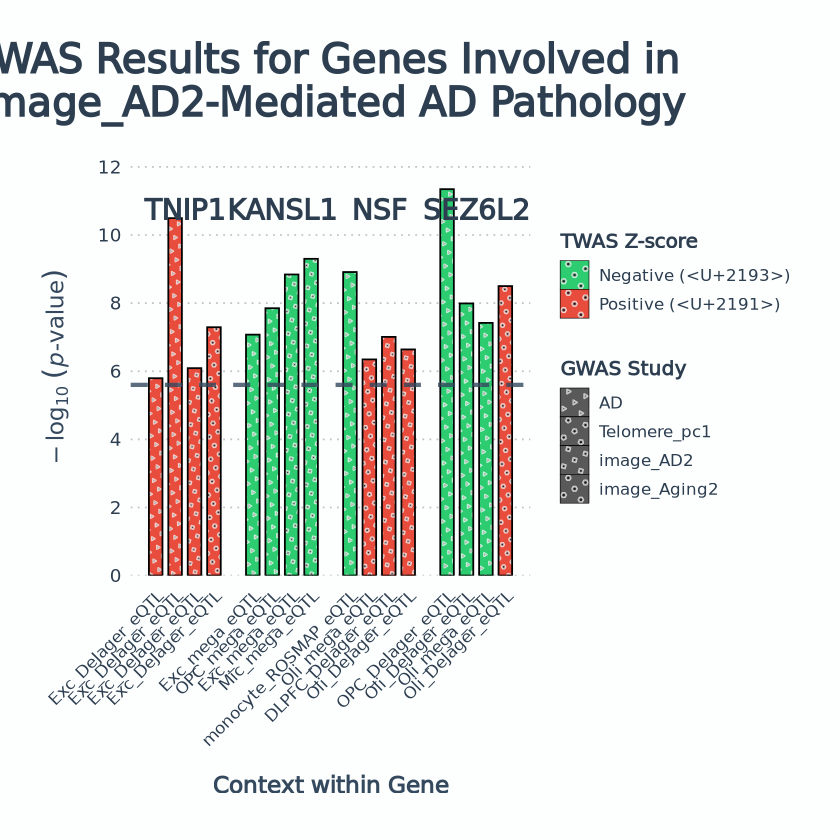

In [70]:
# Modified R code for gene-grouped bar plot
library(ggplot2)
library(ggpattern)

# Create position variable for spacing between genes
# Order by gene_name and gwas_study to group bars by GWAS study within each gene
plot_data_processed <- plot_data %>%
  arrange(gene_name, gwas_study, context) %>%  # Changed order to group by gwas_study within gene
  group_by(gene_name) %>%
  mutate(context_within_gene = row_number()) %>%
  ungroup()

# Calculate counts for each gene
tnip1_count <- sum(plot_data_processed$gene_name == "TNIP1")
kansl1_count <- sum(plot_data_processed$gene_name == "KANSL1")
nsf_count <- sum(plot_data_processed$gene_name == "NSF")
sez6l2_count <- sum(plot_data_processed$gene_name == "SEZ6L2")

# Calculate x_pos with spacing between genes
plot_data_processed <- plot_data_processed %>%
  mutate(x_pos = case_when(
    gene_name == "TNIP1" ~ context_within_gene,
    gene_name == "KANSL1" ~ context_within_gene + tnip1_count + 1,
    gene_name == "NSF" ~ context_within_gene + tnip1_count + kansl1_count + 2,
    gene_name == "SEZ6L2" ~ context_within_gene + tnip1_count + kansl1_count + nsf_count  + 3,
    TRUE ~ NA_real_  # fallback for any unexpected gene names
  ))

# Calculate gene group centers and y position for annotations
gene_centers <- plot_data_processed %>%
  group_by(gene_name) %>%
  summarise(
    center_x = mean(x_pos),
    .groups = "drop"
  )

# Calculate annotation y position (lower than before)
max_y <- max(plot_data_processed$neg_log_twas_pval)
annotation_y <- max_y * 0.95  # Lowered from 1.1 to 0.95

# Create the plot with proper spacing
p_gene_grouped_AD2 <- plot_data_processed %>%
  ggplot(aes(x = x_pos, y = neg_log_twas_pval)) +
  
  # Patterned bars with distinct regular polygon shapes for each GWAS study
  geom_bar_pattern(
    aes(fill = twas_z_sign, pattern_shape = gwas_study),
    stat = "identity", 
    pattern = 'regular_polygon',
    width = 0.7,
    colour = "black",
    size = 0.5,
    pattern_density = 0.4,
    pattern_spacing = 0.025,
    pattern_colour = "white",
    pattern_fill = "black",
    pattern_alpha = 0.7
  ) +
  
  # Threshold line at y = 0.05
  geom_hline(yintercept = 5.6, 
             linetype = "dashed", 
             color = "#34495E", 
             size = 1.2, 
             alpha = 0.8) +
  
  # Color scheme
  scale_fill_manual(
    values = c("Positive" = "#E74C3C", "Negative" = "#2ECC71"),
    name = "TWAS Z-score",
    labels = c("Negative" = "Negative (↓)", "Positive" = "Positive (↑)")
  ) +
  
  # Assign a specific shape to each study using the best practice from the documentation
  scale_pattern_shape_manual(
    name = "GWAS Study",
    values = setNames(
      # Use a variety of convex and star shapes for maximum distinction
      c("convex3", "convex4", "convex5", "convex6", "star4", "star5", "star6")[1:length(unique(plot_data_processed$gwas_study))],
      unique(plot_data_processed$gwas_study)
    )
  ) +
  
  # Custom x-axis with proper spacing and labels
  scale_x_continuous(
    breaks = plot_data_processed$x_pos,
    labels = plot_data_processed$context,
    expand = expansion(mult = c(0.05, 0.05))
  ) +
  
  # Y-axis - adjusted to accommodate lower gene labels
  scale_y_continuous(
    expand = expansion(mult = c(0, 0.08)),
    breaks = scales::pretty_breaks(n = 6)
  ) +
  
  # Labels
  labs(
    title = "TWAS Results for Genes Involved in 
Image_AD2-Mediated AD Pathology",
    x = "Context within Gene",
    y = bquote(-log[10]~(italic(p)*"-value"))
    # caption = "Grouped by gene • Bar colors: TWAS Z-score direction • Patterns: GWAS study • Dashed line: p = 0.05"
  ) +
  
  # Add gene group labels - dynamically positioned and lowered
  annotate("text", 
           x = gene_centers$center_x[gene_centers$gene_name == "TNIP1"],
           y = annotation_y,
           label = "TNIP1", 
           size = 6, 
           fontface = "bold",
           color = "#2C3E50") +

  annotate("text", 
           x = gene_centers$center_x[gene_centers$gene_name == "KANSL1"],
           y = annotation_y,
           label = "KANSL1", 
           size = 6, 
           fontface = "bold",
           color = "#2C3E50") +
  
  annotate("text", 
           x = gene_centers$center_x[gene_centers$gene_name == "NSF"],
           y = annotation_y,
           label = "NSF", 
           size = 6, 
           fontface = "bold",
           color = "#2C3E50") +
  
  annotate("text", 
           x = gene_centers$center_x[gene_centers$gene_name == "SEZ6L2"],
           y = annotation_y,
           label = "SEZ6L2", 
           size = 6, 
           fontface = "bold",
           color = "#2C3E50") +

  # Theme with increased plot width
  theme_minimal(base_size = 12) +
  theme(
    plot.title = element_text(size = 24, face = "bold", hjust = 0.5, color = "#2C3E50", margin = margin(b = 20)),
    axis.title.x = element_text(size = 14, face = "bold", color = "#34495E", margin = margin(t = 15)),
    axis.title.y = element_text(size = 14, face = "bold", color = "#34495E", margin = margin(r = 15)),
    axis.text.x = element_text(angle = 45, hjust = 1, size = 10, color = "#2C3E50", margin = margin(t = 5)),
    axis.text.y = element_text(size = 11, color = "#2C3E50"),
    legend.position = "right",
    legend.title = element_text(face = "bold", size = 12, color = "#2C3E50"),
    legend.text = element_text(size = 10, color = "#2C3E50"),
    legend.box = "vertical",
    panel.grid.major.y = element_line(color = "#BDC3C7", size = 0.5, linetype = "dotted"),
    panel.grid.minor = element_blank(),
    panel.grid.major.x = element_blank(),
    panel.background = element_rect(fill = "#FDFEFE", color = NA),
    plot.background = element_rect(fill = "#FDFEFE", color = NA),
    plot.caption = element_text(size = 10, color = "#7F8C8D", hjust = 0.5, margin = margin(t = 15)),
    plot.margin = margin(25, 25, 25, 25)
  )

# Display the plot with increased width
print(p_gene_grouped_AD2)



In [71]:
ggsave("twas_AD2.png", plot = p_gene_grouped_AD2, width = 16, height = 10, dpi = 300)

## image_AD1

In [76]:
SREBP2_story_genes = annotated_all |> filter(gene_name %in% c("NBEAL1", "SCAP")) |> filter(is_selected_method, twas_pval < 2.5*1e-6)
dim(SREBP2_story_genes)
SREBP2_story_genes = SREBP2_story_genes |> arrange(gene_name, gwas_study)


[1] 24 16

In [77]:
# context_gene_pair_SREBP2 = SREBP2_story_genes |> count(gene_name) |> rename(context_gene_pair = n)

In [78]:
# context_gene_pair_SREBP2

In [79]:
# SREBP2_story_genes = SREBP2_story_genes  |>  
#   left_join(context_gene_pair_SREBP2, by = "gene_name") |>
#    mutate(adjusted_p = (function(p) { o <- order(p); ro <- order(o); pmin(1, cummin(rev(p[o] * context_gene_pair / seq_along(p))))[rev(seq_along(p))][ro] })(twas_pval), bonff_p = pmin(1, twas_pval * context_gene_pair))

In [80]:
SREBP2_story_genes = SREBP2_story_genes |> mutate(gwas_study = ifelse(grepl("Jansen|Bellenguez|Wightman", gwas_study), "AD", gwas_study)) |> mutate(context = ifelse(grepl("MSBB", context), "MSBB_eQTL", context)) |> mutate(context = str_replace(context, 
                               "^(.+?_sQTL)[^:]*:.*:(clu_\\d+_\\+):([A-Z]+):.*$", 
                               "\\1:\\2:\\3"))

In [81]:
# SREBP1_story_genes

NBEAL1_selected <- SREBP2_story_genes |> filter(type == "eQTL") |>
  filter(gene_name == "NBEAL1") |> 
  group_by(gwas_study,context) |> 
  slice_min(twas_pval, n = 1, with_ties = FALSE)

NBEAL1_selected = NBEAL1_selected[-c(5, 6, 9), ]
NBEAL1_selected
# KANSL1_added = AD2_story_genes |> filter(type == "eQTL") |>
#   filter(gene_name == "KANSL1") |>
#   filter(str_detect(context, "Exc")) |>
#   group_by(gwas_study) |> 
#   slice_min(twas_pval, n = 1, with_ties = FALSE)
# KANSL1_selected = KANSL1_selected |> filter(!gwas_study %in% c("Bellenguez_2022"))
#   KANSL1_selected = bind_rows(KANSL1_selected, KANSL1_added)
# KANSL1_selected 

chr,molecular_id,gene_name,context,gwas_study,twas_z,twas_pval,start,end,method,is_imputable,is_selected_method,rsq_cv,pval_cv,type,block
<int>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<int>,<int>,<chr>,<lgl>,<lgl>,<dbl>,<dbl>,<chr>,<chr>
2,ENSG00000144426,NBEAL1,AC_DeJager_eQTL,AD,4.771941,1.824592e-06,203014877,203014878,mvsusie,TRUE,TRUE,0.19105931,4.588913e-29,eQTL,chr2_201677542_203951659
2,ENSG00000144426,NBEAL1,MSBB_eQTL,AD,5.032025,4.853266e-07,203014877,203014878,mvsusie,TRUE,TRUE,0.16711750,9.854584e-12,eQTL,chr2_201677542_203951659
2,ENSG00000144426,NBEAL1,AC_DeJager_eQTL,image_Aging5,6.991063,2.728118e-12,202014878,204226378,mvsusie,TRUE,TRUE,0.18969055,4.588913e-29,eQTL,chr2_201677542_203951659
2,ENSG00000144426,NBEAL1,Ast_DeJager_eQTL,image_Aging5,4.843203,1.277628e-06,202014878,204226378,mrash,TRUE,TRUE,0.11309722,9.300068e-13,eQTL,chr2_201677542_203951659
2,ENSG00000144426,NBEAL1,MSBB_eQTL,image_Aging5,8.679166,3.986806e-18,202014878,204226378,susie,TRUE,TRUE,0.14699843,3.019305e-11,eQTL,chr2_201677542_203951659
2,ENSG00000144426,NBEAL1,Oli_mega_eQTL,image_Aging5,5.976667,2.277488e-09,202014878,204226378,mrash,TRUE,TRUE,0.01297861,1.134649e-03,eQTL,chr2_201677542_203951659


In [82]:
SCAP_selected = SREBP2_story_genes |> filter(type == "eQTL") |>
  filter(gene_name == "SCAP") |> 
  group_by(gwas_study,context) |> 
  slice_min(twas_pval, n = 1, with_ties = FALSE)
SCAP_selected = SCAP_selected[-3,]
SCAP_selected

chr,molecular_id,gene_name,context,gwas_study,twas_z,twas_pval,start,end,method,is_imputable,is_selected_method,rsq_cv,pval_cv,type,block
<int>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<int>,<int>,<chr>,<lgl>,<lgl>,<dbl>,<dbl>,<chr>,<chr>
3,ENSG00000114650,SCAP,DLPFC_DeJager_eQTL,image_AD1,5.595695,2.197396e-08,46413681,50320000,susie,TRUE,TRUE,0.20064693,3.585218e-40,eQTL,chr3_45108216_47545024
3,ENSG00000114650,SCAP,Exc_mega_eQTL,image_AD1,-5.593707,2.222723e-08,46413681,50320000,susie,TRUE,TRUE,0.03106830,8.772242e-07,eQTL,chr3_45108216_47545024
3,ENSG00000114650,SCAP,Inh_mega_eQTL,image_AD1,-5.441148,5.293833e-08,46413681,50320000,susie,TRUE,TRUE,0.02057304,5.561592e-05,eQTL,chr3_45108216_47545024
3,ENSG00000114650,SCAP,Knight_eQTL_brain,image_AD1,5.408284,6.363147e-08,46413681,50320000,enet,TRUE,TRUE,0.20150353,3.567258e-19,eQTL,chr3_45108216_47545024
3,ENSG00000114650,SCAP,MSBB_eQTL,image_AD1,5.325171,1.008579e-07,46413681,50320000,mvsusie,TRUE,TRUE,0.27284584,1.528883e-19,eQTL,chr3_45108216_47545024


In [83]:
NBEAL1_SCAP = bind_rows(NBEAL1_selected, SCAP_selected)

In [84]:

plot_data <- NBEAL1_SCAP %>%
    mutate(
      # Calculate -log10(bonferroni p-value)
      neg_log_twas_pval = -log10(twas_pval),
      # Create color factor based on twas_z sign
      twas_z_sign = ifelse(twas_z < 0, "Negative", "Positive"),
      # Clean up context names for better display (optional)
      context_clean = gsub("_", " ", context)
    )

# Calculate threshold line for p = 0.05
# threshold_line <- -log10(0.05)

In [85]:
plot_data = plot_data |> filter(!(context == "ROSMAP_AC_sQTL:clu_18055_+:PR" & twas_z >-6))


In [86]:
plot_data

chr,molecular_id,gene_name,context,gwas_study,twas_z,twas_pval,start,end,method,is_imputable,is_selected_method,rsq_cv,pval_cv,type,block,neg_log_twas_pval,twas_z_sign,context_clean
<int>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<int>,<int>,<chr>,<lgl>,<lgl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>
2,ENSG00000144426,NBEAL1,AC_DeJager_eQTL,AD,4.771941,1.824592e-06,203014877,203014878,mvsusie,TRUE,TRUE,0.19105931,4.588913e-29,eQTL,chr2_201677542_203951659,5.738834,Positive,AC DeJager eQTL
2,ENSG00000144426,NBEAL1,MSBB_eQTL,AD,5.032025,4.853266e-07,203014877,203014878,mvsusie,TRUE,TRUE,0.16711750,9.854584e-12,eQTL,chr2_201677542_203951659,6.313966,Positive,MSBB eQTL
2,ENSG00000144426,NBEAL1,AC_DeJager_eQTL,image_Aging5,6.991063,2.728118e-12,202014878,204226378,mvsusie,TRUE,TRUE,0.18969055,4.588913e-29,eQTL,chr2_201677542_203951659,11.564137,Positive,AC DeJager eQTL
2,ENSG00000144426,NBEAL1,Ast_DeJager_eQTL,image_Aging5,4.843203,1.277628e-06,202014878,204226378,mrash,TRUE,TRUE,0.11309722,9.300068e-13,eQTL,chr2_201677542_203951659,5.893595,Positive,Ast DeJager eQTL
2,ENSG00000144426,NBEAL1,MSBB_eQTL,image_Aging5,8.679166,3.986806e-18,202014878,204226378,susie,TRUE,TRUE,0.14699843,3.019305e-11,eQTL,chr2_201677542_203951659,17.399375,Positive,MSBB eQTL
2,ENSG00000144426,NBEAL1,Oli_mega_eQTL,image_Aging5,5.976667,2.277488e-09,202014878,204226378,mrash,TRUE,TRUE,0.01297861,1.134649e-03,eQTL,chr2_201677542_203951659,8.642544,Positive,Oli mega eQTL
3,ENSG00000114650,SCAP,DLPFC_DeJager_eQTL,image_AD1,5.595695,2.197396e-08,46413681,50320000,susie,TRUE,TRUE,0.20064693,3.585218e-40,eQTL,chr3_45108216_47545024,7.658092,Positive,DLPFC DeJager eQTL
3,ENSG00000114650,SCAP,Exc_mega_eQTL,image_AD1,-5.593707,2.222723e-08,46413681,50320000,susie,TRUE,TRUE,0.03106830,8.772242e-07,eQTL,chr3_45108216_47545024,7.653115,Negative,Exc mega eQTL
3,ENSG00000114650,SCAP,Inh_mega_eQTL,image_AD1,-5.441148,5.293833e-08,46413681,50320000,susie,TRUE,TRUE,0.02057304,5.561592e-05,eQTL,chr3_45108216_47545024,7.276230,Negative,Inh mega eQTL


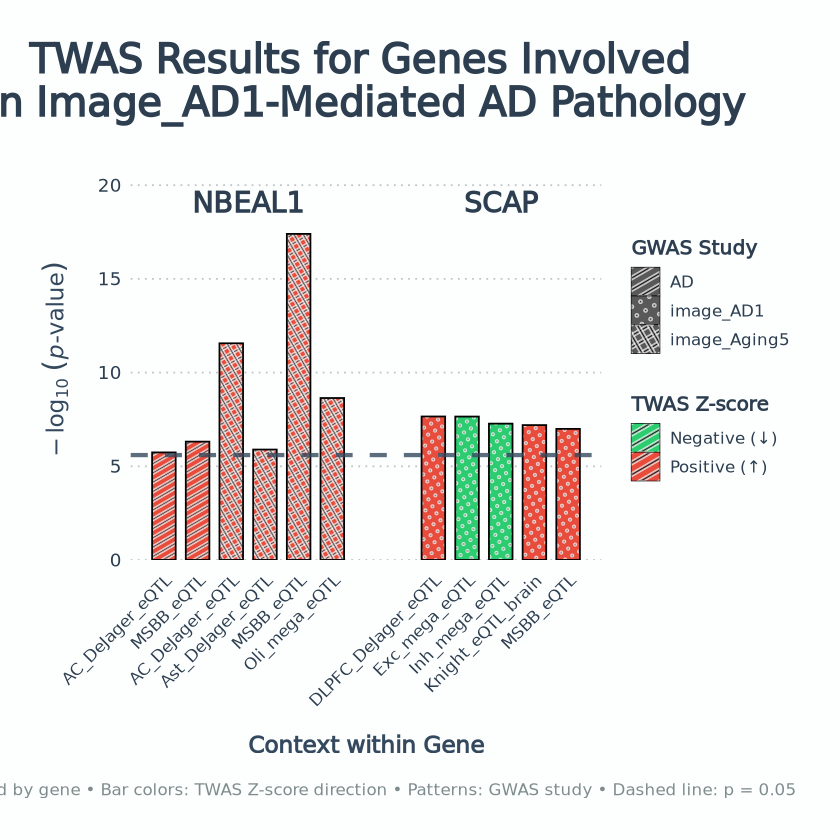

In [87]:
# Modified R code for gene-grouped bar plot
library(ggplot2)
library(ggpattern)

# Create position variable for spacing between genes
plot_data_processed <- plot_data %>%
  group_by(gene_name) %>%
  mutate(context_within_gene = row_number()) %>%
arrange(gene_name, gwas_study, context) |>
  ungroup()

# Calculate positions with proper spacing
nbeal1_count <- sum(plot_data_processed$gene_name == "NBEAL1")
plot_data_processed <- plot_data_processed %>%
  mutate(x_pos = ifelse(gene_name == "NBEAL1", 
                        context_within_gene, 
                        context_within_gene + nbeal1_count + 2))

# Create the plot with proper spacing
p_gene_grouped <- plot_data_processed %>%
  ggplot(aes(x = x_pos, y = neg_log_twas_pval)) +
  
  # Patterned bars with correct pattern mapping
  geom_bar_pattern(
    aes(fill = twas_z_sign, pattern = gwas_study),
    stat = "identity", 
    width = 0.7,
    colour = "black",
    size = 0.5,
    pattern_density = 0.3,
    pattern_spacing = 0.02,
    pattern_colour = "white",
    pattern_fill = "black",
    pattern_alpha = 0.7
  ) +
  
  # Threshold line at y = 0.05
  geom_hline(yintercept = 5.6, 
             linetype = "dashed", 
             color = "#34495E", 
             size = 1.2, 
             alpha = 0.8) +
  
  # Color scheme
  scale_fill_manual(
    values = c("Positive" = "#E74C3C", "Negative" = "#2ECC71"),
    name = "TWAS Z-score",
    labels = c("Negative" = "Negative (↓)", "Positive" = "Positive (↑)")
  ) +
  
  # Pattern scale for different GWAS studies - ensure all study values are included
  scale_pattern_manual(
    values = setNames(c("stripe", "crosshatch", "circle", "none")[1:length(unique(plot_data_processed$gwas_study))],
                      unique(plot_data_processed$gwas_study)),
    name = "GWAS Study"
  ) +
  
  # Custom x-axis with proper spacing and labels
  scale_x_continuous(
    breaks = plot_data_processed$x_pos,
    labels = plot_data_processed$context,
    expand = expansion(mult = c(0.05, 0.05))
  ) +
  
  # Y-axis
  scale_y_continuous(
    expand = expansion(mult = c(0, 0.12)),
    breaks = scales::pretty_breaks(n = 6)
  ) +
  
  # Labels
  labs(
    title = "TWAS Results for Genes Involved \nin Image_AD1-Mediated AD Pathology",
    x = "Context within Gene",
    y = bquote(-log[10]~(italic(p)*"-value")),
    caption = "Grouped by gene • Bar colors: TWAS Z-score direction • Patterns: GWAS study • Dashed line: p = 0.05"
  ) +
  
  # Add gene group labels
  annotate("text", 
           x = mean(plot_data_processed$x_pos[plot_data_processed$gene_name == "NBEAL1"]),
           y = max(plot_data_processed$neg_log_twas_pval) * 1.1,
           label = "NBEAL1", 
           size = 6, 
           fontface = "bold",
           color = "#2C3E50") +
  
  annotate("text", 
           x = mean(plot_data_processed$x_pos[plot_data_processed$gene_name == "SCAP"]),
           y = max(plot_data_processed$neg_log_twas_pval) * 1.1,
           label = "SCAP", 
           size = 6, 
           fontface = "bold",
           color = "#2C3E50") +
  
  # Theme with increased plot width
  theme_minimal(base_size = 12) +
  theme(
    plot.title = element_text(size = 24, face = "bold", hjust = 0.5, color = "#2C3E50", margin = margin(b = 20)),
    axis.title.x = element_text(size = 14, face = "bold", color = "#34495E", margin = margin(t = 15)),
    axis.title.y = element_text(size = 14, face = "bold", color = "#34495E", margin = margin(r = 15)),
    axis.text.x = element_text(angle = 45, hjust = 1, size = 10, color = "#2C3E50", margin = margin(t = 5)),
    axis.text.y = element_text(size = 11, color = "#2C3E50"),
    legend.position = "right",
    legend.title = element_text(face = "bold", size = 12, color = "#2C3E50"),
    legend.text = element_text(size = 10, color = "#2C3E50"),
    legend.box = "vertical",
    panel.grid.major.y = element_line(color = "#BDC3C7", size = 0.5, linetype = "dotted"),
    panel.grid.minor = element_blank(),
    panel.grid.major.x = element_blank(),
    panel.background = element_rect(fill = "#FDFEFE", color = NA),
    plot.background = element_rect(fill = "#FDFEFE", color = NA),
    plot.caption = element_text(size = 10, color = "#7F8C8D", hjust = 0.5, margin = margin(t = 15)),
    plot.margin = margin(25, 25, 25, 25)
  )

# Display the plot with increased width
print(p_gene_grouped)

In [88]:
ggsave("twas_SREBP2.png", p_gene_grouped, width = 10, height = 8, dpi = 300)


## Aging

In [23]:
annotated_all |> filter(gene_name %in% c("DNAJC5","GGT7", "NCOA6") , twas_pval < 2.5*1e-6) |> arrange(gene_name, gwas_study, context)#, gwas_study == 'TL1'
# annotated_all |> filter(gene_name == "TNF", twas_pval < 2.5*1e-6) #, gwas_study == 'TL1'
# annotated_all |> filter(str_detect(context, "Mic"), gwas_study == 'image_Aging3', twas_pval < 2.5*1e-6) |> pull(gene_name) |> unique()
# annotated_all |> filter(str_detect(context, "Mic"), gwas_study == 'image_AD1', twas_pval < 2.5*1e-6) |> pull(gene_name) |> unique()


chr,molecular_id,gene_name,context,gwas_study,twas_z,twas_pval,start,end,method,is_imputable,is_selected_method,rsq_cv,pval_cv,type,block
<int>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<int>,<int>,<chr>,<lgl>,<lgl>,<dbl>,<dbl>,<chr>,<chr>
20,ENSG00000101152,DNAJC5,BM_36_MSBB_eQTL,Telomere_pc1,8.616714,6.890273e-18,59520000,64444167,bayes_l,TRUE,FALSE,0.009925734,7.077183e-02,eQTL,chr20_63558301_64331539
20,ENSG00000101152,DNAJC5,BM_36_MSBB_eQTL,Telomere_pc1,8.256135,1.504655e-16,59520000,64444167,bayes_r,TRUE,FALSE,0.006065110,1.229251e-01,eQTL,chr20_63558301_64331539
20,ENSG00000101152,DNAJC5,BM_36_MSBB_eQTL,Telomere_pc1,6.593224,4.303762e-11,59520000,64444167,mrash,TRUE,TRUE,0.018334380,2.251629e-02,eQTL,chr20_63558301_64331539
20,ENSG00000101152,DNAJC5,Exc_mega_eQTL,Telomere_pc1,-8.585080,9.077341e-18,59520000,64444167,enet,TRUE,FALSE,0.022132375,2.969116e-05,eQTL,chr20_63558301_64331539
20,ENSG00000101152,DNAJC5,Exc_mega_eQTL,Telomere_pc1,-9.603149,7.753826e-22,59520000,64444167,lasso,TRUE,TRUE,0.023314618,1.861451e-05,eQTL,chr20_63558301_64331539
20,ENSG00000101152,DNAJC5,Exc_mega_eQTL,Telomere_pc1,-10.149955,3.315162e-24,59520000,64444167,mrash,TRUE,FALSE,0.008171055,8.038217e-03,eQTL,chr20_63558301_64331539
20,ENSG00000101152,DNAJC5,Exc_mega_eQTL,Telomere_pc1,-5.310365,1.094056e-07,59520000,64444167,susie,TRUE,FALSE,0.011731679,1.876572e-03,eQTL,chr20_63558301_64331539
20,ENSG00000101152,DNAJC5,Knight_eQTL_brain,Telomere_pc1,5.044622,4.544199e-07,59520000,64444167,mrash,TRUE,FALSE,0.015144169,1.166506e-02,eQTL,chr20_63558301_64331539
20,ENSG00000101152,DNAJC5,Mic_mega_eQTL,Telomere_pc1,-5.713537,1.106519e-08,59520000,64444167,enet,TRUE,FALSE,0.001942273,1.198834e-01,eQTL,chr20_63558301_64331539


In [50]:
AD1_Aging_genes = annotated_all |> filter(gene_name %in% c("CCDC12", "KIF9", "CBY1", "KLHL18", "NBEAL2", "KLHDC8B","PDCD11", "SETD2", "PLXNB1", "MON1A", "USP19", "LSMEM2", "MFSD13A", "MAP4", "SBSPON", "BIN1"), twas_pval < 2.5*1e-6)#, is_selected_method


In [51]:
CBY1_Aging = annotated_all |> filter(gene_name == "CBY1", twas_pval < 2.5*1e-6, is_selected_method)
CBY1_Aging


chr,molecular_id,gene_name,context,gwas_study,twas_z,twas_pval,start,end,method,is_imputable,is_selected_method,rsq_cv,pval_cv,type,block
<int>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<int>,<int>,<chr>,<lgl>,<lgl>,<dbl>,<dbl>,<chr>,<chr>
22,ENSG00000100211,CBY1,BM_22_MSBB_eQTL,Telomere_pc1,-4.948265,7.487789e-07,37520000,41680000,enet,TRUE,TRUE,0.03026583,3.137843e-03,eQTL,chr22_37320379_39179317
22,ENSG00000100211,CBY1,Exc_DeJager_eQTL,Telomere_pc1,-5.211316,1.875062e-07,37520000,41680000,mvsusie,TRUE,TRUE,0.23779613,1.240421e-26,eQTL,chr22_37320379_39179317
22,ENSG00000100211,CBY1,Inh_DeJager_eQTL,Telomere_pc1,-5.291617,1.212398e-07,37520000,41680000,mvsusie,TRUE,TRUE,0.07417743,8.759900e-09,eQTL,chr22_37320379_39179317
22,ENSG00000100211,CBY1,Exc_mega_eQTL,Telomere_pc1,-5.422526,5.876251e-08,37520000,41680000,susie,TRUE,TRUE,0.26004704,2.979502e-50,eQTL,chr22_37320379_39179317


In [52]:
CBY1_AD = annotated_all |> filter(gene_name == "CBY1", twas_pval < 2.5*1e-6) |> filter(context == "Exc_DeJager_eQTL", gwas_study == 'Wightman_Full_2021', method == "bayes_l")
CBY1_AD

chr,molecular_id,gene_name,context,gwas_study,twas_z,twas_pval,start,end,method,is_imputable,is_selected_method,rsq_cv,pval_cv,type,block
<int>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<int>,<int>,<chr>,<lgl>,<lgl>,<dbl>,<dbl>,<chr>,<chr>
22,ENSG00000100211,CBY1,Exc_DeJager_eQTL,Wightman_Full_2021,4.996974,5.823702e-07,38656638,38656639,bayes_l,TRUE,FALSE,0.203182,2.328474e-22,eQTL,chr22_37320379_39179317


In [53]:
Aging_cilia_genes = bind_rows(
  AD1_Aging_genes,
  CBY1_AD
) |> unique()
#Aging_cilia_genes |> arrange(gene_name, gwas_study)

In [54]:
Aging_cilia_genes |> filter(gene_name == "MON1A")

chr,molecular_id,gene_name,context,gwas_study,twas_z,twas_pval,start,end,method,is_imputable,is_selected_method,rsq_cv,pval_cv,type,block
<int>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<int>,<int>,<chr>,<lgl>,<lgl>,<dbl>,<dbl>,<chr>,<chr>
3,ENSG00000164077,MON1A,MSBB_BM36_pQTL_chr3_Q86VX9,Telomere_pc1,5.482784,4.186841e-08,46680000,50930173,mrash,TRUE,FALSE,0.0396618734,3.878333e-03,pQTL,chr3_47545024_52179438
3,ENSG00000164077,MON1A,Ast_DeJager_eQTL,Telomere_pc1,-5.192607,2.073691e-07,46680000,50930173,bayes_l,TRUE,FALSE,-0.0011279582,4.674169e-01,eQTL,chr3_47545024_52179438
3,ENSG00000164077,MON1A,Ast_DeJager_eQTL,Telomere_pc1,-5.131576,2.873264e-07,46680000,50930173,bayes_r,TRUE,FALSE,0.0001086653,3.071554e-01,eQTL,chr3_47545024_52179438
3,ENSG00000164077,MON1A,Ast_DeJager_eQTL,Telomere_pc1,-5.165670,2.395786e-07,46680000,50930173,lasso,TRUE,FALSE,-0.0007003522,4.007712e-01,eQTL,chr3_47545024_52179438
3,ENSG00000164077,MON1A,DLPFC_DeJager_eQTL,Telomere_pc1,5.180704,2.210505e-07,46680000,50930173,lasso,TRUE,FALSE,0.0113818396,1.613179e-03,eQTL,chr3_47545024_52179438
3,ENSG00000164077,MON1A,PCC_DeJager_eQTL,Telomere_pc1,8.313951,9.256700e-17,46680000,50930173,bayes_l,TRUE,FALSE,0.0119084484,1.241279e-02,eQTL,chr3_47545024_52179438
3,ENSG00000164077,MON1A,PCC_DeJager_eQTL,Telomere_pc1,8.228121,1.901724e-16,46680000,50930173,bayes_r,TRUE,FALSE,0.0079644615,3.381308e-02,eQTL,chr3_47545024_52179438
3,ENSG00000164077,MON1A,PCC_DeJager_eQTL,Telomere_pc1,9.824938,8.792771e-23,46680000,50930173,enet,TRUE,FALSE,0.0107258788,1.671134e-02,eQTL,chr3_47545024_52179438
3,ENSG00000164077,MON1A,PCC_DeJager_eQTL,Telomere_pc1,9.382684,6.431413e-21,46680000,50930173,lasso,TRUE,FALSE,0.0182526594,2.590587e-03,eQTL,chr3_47545024_52179438


In [55]:
Aging_cilia_genes |> filter(gene_name == "PLXNB1")

chr,molecular_id,gene_name,context,gwas_study,twas_z,twas_pval,start,end,method,is_imputable,is_selected_method,rsq_cv,pval_cv,type,block
<int>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<int>,<int>,<chr>,<lgl>,<lgl>,<dbl>,<dbl>,<chr>,<chr>
3,ENSG00000164050,PLXNB1,Inh_mega_eQTL,Telomere_pc1,6.087669,1.145662e-09,46680000,50320000,enet,TRUE,FALSE,0.025099622,9.328429e-06,eQTL,chr3_47545024_52179438
3,ENSG00000164050,PLXNB1,Inh_mega_eQTL,Telomere_pc1,6.143722,8.060971e-10,46680000,50320000,lasso,TRUE,TRUE,0.025161733,9.103058e-06,eQTL,chr3_47545024_52179438
3,ENSG00000164050,PLXNB1,Inh_mega_eQTL,Telomere_pc1,6.325496,2.524206e-10,46680000,50320000,mrash,TRUE,FALSE,0.024517769,1.173079e-05,eQTL,chr3_47545024_52179438
3,ENSG00000164050,PLXNB1,MSBB_BM36_pQTL_chr3_O43157,image_AD1,-5.102090,3.359237e-07,46680000,50320000,susie,TRUE,FALSE,0.012983987,6.653188e-02,pQTL,chr3_47545024_52179438
3,ENSG00000164050,PLXNB1,monocyte_ROSMAP_eQTL,image_AD1,-5.927922,3.067915e-09,46680000,50320000,bayes_l,TRUE,FALSE,0.004165362,1.649273e-01,eQTL,chr3_47545024_52179438
3,ENSG00000164050,PLXNB1,monocyte_ROSMAP_eQTL,image_AD1,-5.398946,6.703362e-08,46680000,50320000,bayes_r,TRUE,FALSE,0.002987016,1.970438e-01,eQTL,chr3_47545024_52179438
3,ENSG00000164050,PLXNB1,monocyte_ROSMAP_eQTL,image_AD1,-6.072126,1.262278e-09,46680000,50320000,enet,TRUE,FALSE,-0.004459236,9.732592e-01,eQTL,chr3_47545024_52179438
3,ENSG00000164050,PLXNB1,monocyte_ROSMAP_eQTL,image_AD1,-6.757844,1.400607e-11,46680000,50320000,lasso,TRUE,FALSE,-0.003420997,6.298532e-01,eQTL,chr3_47545024_52179438
3,ENSG00000164050,PLXNB1,monocyte_ROSMAP_eQTL,image_AD1,-6.692782,2.189673e-11,46680000,50320000,mrash,TRUE,FALSE,0.000903138,2.738231e-01,eQTL,chr3_47545024_52179438


In [56]:
Aging_cilia_genes |> filter(gene_name == "USP19")

chr,molecular_id,gene_name,context,gwas_study,twas_z,twas_pval,start,end,method,is_imputable,is_selected_method,rsq_cv,pval_cv,type,block
<int>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<int>,<int>,<chr>,<lgl>,<lgl>,<dbl>,<dbl>,<chr>,<chr>
3,ENSG00000172046,USP19,BM_44_MSBB_eQTL,Telomere_pc1,4.904352,9.373630e-07,46680000,50320000,enet,TRUE,FALSE,-0.001863853,0.46912926,eQTL,chr3_47545024_52179438
3,ENSG00000172046,USP19,MSBB_BM36_pQTL_chr3_O94966,Telomere_pc1,-6.694346,2.166386e-11,46680000,50320000,mrash,TRUE,FALSE,-0.003422431,0.54060810,pQTL,chr3_47545024_52179438
3,ENSG00000172046,USP19,MSBB_BM36_pQTL_chr3_O94966,Telomere_pc1,-8.552964,1.199677e-17,46680000,50320000,susie,TRUE,FALSE,-0.005426760,0.91194525,pQTL,chr3_47545024_52179438
3,ENSG00000172046,USP19,monocyte_ROSMAP_eQTL,Telomere_pc1,-5.800300,6.619619e-09,46680000,50320000,bayes_l,TRUE,FALSE,0.002320549,0.21840836,eQTL,chr3_47545024_52179438
3,ENSG00000172046,USP19,monocyte_ROSMAP_eQTL,Telomere_pc1,-5.124350,2.985652e-07,46680000,50320000,bayes_r,TRUE,TRUE,0.014854467,0.03721703,eQTL,chr3_47545024_52179438
3,ENSG00000172046,USP19,monocyte_ROSMAP_eQTL,Telomere_pc1,-4.812790,1.488378e-06,46680000,50320000,mrash,TRUE,FALSE,0.005959492,0.12678056,eQTL,chr3_47545024_52179438
3,ENSG00000172046,USP19,monocyte_ROSMAP_eQTL,image_AD1,5.529868,3.204717e-08,46680000,50320000,bayes_l,TRUE,FALSE,0.002320549,0.21840836,eQTL,chr3_47545024_52179438
3,ENSG00000172046,USP19,monocyte_ROSMAP_eQTL,image_AD1,5.722808,1.047774e-08,46680000,50320000,bayes_r,TRUE,TRUE,0.014854467,0.03721703,eQTL,chr3_47545024_52179438
3,ENSG00000172046,USP19,monocyte_ROSMAP_eQTL,image_AD1,4.953944,7.272426e-07,46680000,50320000,mrash,TRUE,FALSE,0.005959492,0.12678056,eQTL,chr3_47545024_52179438


In [57]:
Aging_cilia_genes |> filter(gene_name == "MAP4")

chr,molecular_id,gene_name,context,gwas_study,twas_z,twas_pval,start,end,method,is_imputable,is_selected_method,rsq_cv,pval_cv,type,block
<int>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<int>,<int>,<chr>,<lgl>,<lgl>,<dbl>,<dbl>,<chr>,<chr>
3,ENSG00000047849,MAP4,Oli_DeJager_eQTL,Telomere_pc1,-7.285998,3.192988e-13,46680000,50320000,bayes_l,TRUE,FALSE,0.028812347,2.838190e-04,eQTL,chr3_47545024_52179438
3,ENSG00000047849,MAP4,Oli_DeJager_eQTL,Telomere_pc1,-7.336228,2.196984e-13,46680000,50320000,bayes_r,TRUE,FALSE,0.034630252,7.513862e-05,eQTL,chr3_47545024_52179438
3,ENSG00000047849,MAP4,Oli_DeJager_eQTL,Telomere_pc1,-6.146952,7.898584e-10,46680000,50320000,enet,TRUE,FALSE,0.015255074,6.521214e-03,eQTL,chr3_47545024_52179438
3,ENSG00000047849,MAP4,Oli_DeJager_eQTL,Telomere_pc1,-5.065724,4.068502e-07,46680000,50320000,lasso,TRUE,FALSE,0.021811093,1.417804e-03,eQTL,chr3_47545024_52179438
3,ENSG00000047849,MAP4,Oli_DeJager_eQTL,Telomere_pc1,-7.658023,1.888165e-14,46680000,50320000,mrash,TRUE,TRUE,0.040646419,1.906382e-05,eQTL,chr3_47545024_52179438
3,ENSG00000047849,MAP4,Oli_DeJager_eQTL,Telomere_pc1,-5.619105,1.919495e-08,46680000,50320000,susie,TRUE,FALSE,0.019468045,2.438679e-03,eQTL,chr3_47545024_52179438
3,ENSG00000047849,MAP4,AC_DeJager_eQTL,image_AD1,4.756407,1.970694e-06,46680000,50320000,bayes_l,TRUE,FALSE,0.027958236,2.528632e-05,eQTL,chr3_47545024_52179438
3,ENSG00000047849,MAP4,AC_DeJager_eQTL,image_AD1,4.879063,1.065912e-06,46680000,50320000,mrash,TRUE,FALSE,0.033292653,4.611121e-06,eQTL,chr3_47545024_52179438
3,ENSG00000047849,MAP4,Ast_DeJager_eQTL,image_AD1,5.621410,1.894049e-08,46680000,50320000,mrash,TRUE,FALSE,0.037883579,3.578416e-05,eQTL,chr3_47545024_52179438


In [58]:
Aging_cilia_genes |> filter(gene_name == "SBSPON") |> group_by(gwas_study,context) |> 
  slice_min(twas_pval, n = 1, with_ties = FALSE) |> arrange(gwas_study) 

chr,molecular_id,gene_name,context,gwas_study,twas_z,twas_pval,start,end,method,is_imputable,is_selected_method,rsq_cv,pval_cv,type,block
<int>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<int>,<int>,<chr>,<lgl>,<lgl>,<dbl>,<dbl>,<chr>,<chr>
8,ENSG00000164764,SBSPON,AC_DeJager_eQTL,Telomere_pc1,-5.467477,4.564863e-08,72064543,75360000,lasso,TRUE,FALSE,0.01692953,8.722582e-04,eQTL,chr8_72924454_74340073
8,ENSG00000164764,SBSPON,BM_10_MSBB_eQTL,Telomere_pc1,-5.045952,4.512682e-07,72064543,75360000,mvsusie,TRUE,TRUE,0.03933434,5.639342e-04,eQTL,chr8_72924454_74340073
8,ENSG00000164764,SBSPON,BM_22_MSBB_eQTL,Telomere_pc1,-6.238929,4.405764e-10,72064543,75360000,mrash,TRUE,FALSE,0.02250114,9.535052e-03,eQTL,chr8_72924454_74340073
8,ENSG00000164764,SBSPON,BM_36_MSBB_eQTL,Telomere_pc1,-5.115528,3.128648e-07,72064543,75360000,mrmash,TRUE,FALSE,0.10937204,1.700039e-07,eQTL,chr8_72924454_74340073
8,ENSG00000164764,SBSPON,BM_44_MSBB_eQTL,Telomere_pc1,-5.144548,2.681659e-07,72064543,75360000,mrmash,TRUE,FALSE,0.04732916,2.672000e-04,eQTL,chr8_72924454_74340073


In [59]:
Aging_cilia_genes |> filter(gene_name == "NBEAL2") |> group_by(gwas_study,context) |> 
  slice_min(twas_pval, n = 1, with_ties = FALSE) |> arrange(gwas_study) 

chr,molecular_id,gene_name,context,gwas_study,twas_z,twas_pval,start,end,method,is_imputable,is_selected_method,rsq_cv,pval_cv,type,block
<int>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<int>,<int>,<chr>,<lgl>,<lgl>,<dbl>,<dbl>,<chr>,<chr>
3,ENSG00000160796,NBEAL2,AC_DeJager_eQTL,Telomere_pc1,-5.309631,1.098475e-07,44920000,50320000,mvsusie,TRUE,FALSE,0.0431338826,1.998448e-07,eQTL,chr3_45108216_47545024
3,ENSG00000160796,NBEAL2,Ast_DeJager_eQTL,Telomere_pc1,-5.955138,2.598529e-09,44920000,50320000,mvsusie,TRUE,FALSE,0.0242582384,8.066948e-04,eQTL,chr3_45108216_47545024
3,ENSG00000160796,NBEAL2,BM_10_MSBB_eQTL,Telomere_pc1,-6.822076,8.973419e-12,44920000,50320000,bayes_r,TRUE,FALSE,0.0266516394,3.898541e-03,eQTL,chr3_45108216_47545024
3,ENSG00000160796,NBEAL2,BM_22_MSBB_eQTL,Telomere_pc1,-8.122384,4.571131e-16,44920000,50320000,mrash,TRUE,FALSE,0.0164383405,2.305086e-02,eQTL,chr3_45108216_47545024
3,ENSG00000160796,NBEAL2,BM_36_MSBB_eQTL,Telomere_pc1,-5.753703,8.730952e-09,44920000,50320000,mrmash,TRUE,FALSE,0.0561199187,1.701171e-04,eQTL,chr3_45108216_47545024
3,ENSG00000160796,NBEAL2,BM_44_MSBB_eQTL,Telomere_pc1,-5.734923,9.755670e-09,44920000,50320000,mrmash,TRUE,FALSE,0.0328128441,2.107196e-03,eQTL,chr3_45108216_47545024
3,ENSG00000160796,NBEAL2,DLPFC_DeJager_eQTL,Telomere_pc1,-5.877375,4.168234e-09,44920000,50320000,mvsusie,TRUE,FALSE,0.1062715421,4.360717e-21,eQTL,chr3_45108216_47545024
3,ENSG00000160796,NBEAL2,Exc_DeJager_eQTL,Telomere_pc1,-5.997272,2.006592e-09,44920000,50320000,mvsusie,TRUE,FALSE,0.0554986408,6.428909e-07,eQTL,chr3_45108216_47545024
3,ENSG00000160796,NBEAL2,PCC_DeJager_eQTL,Telomere_pc1,-5.925942,3.105121e-09,44920000,50320000,mvsusie,TRUE,TRUE,0.1094145490,6.113763e-13,eQTL,chr3_45108216_47545024


In [60]:
Aging_cilia_genes_selected = Aging_cilia_genes |> filter(gene_name %in% c("CBY1", "MAP4", "KIF9", "SETD2", "MON1A"))#, "PLXNB1"
Aging_cilia_genes_selected = Aging_cilia_genes_selected |> group_by(gwas_study,context) |> 
  slice_min(twas_pval, n = 1, with_ties = FALSE) |> arrange(gene_name, gwas_study, context)

In [61]:
plot_data <- Aging_cilia_genes_selected %>%
    mutate(
      # Calculate -log10(bonferroni p-value)
      neg_log_twas_pval = -log10(twas_pval),
      # Create color factor based on twas_z sign
      twas_z_sign = ifelse(twas_z < 0, "Negative", "Positive"),
      # Clean up context names for better display (optional)
      context = str_replace(context, 
                               "^(.+?_sQTL)[^:]*:.*:(clu_\\d+_\\+):([A-Z]+):.*$", 
                               "\\1:\\2:\\3"),
      gwas_study = ifelse(grepl("Jansen|Bellenguez|Wightman", gwas_study), "AD", gwas_study))
plot_data = plot_data[-nrow(plot_data),]
plot_data |> arrange(gene_name, gwas_study, context)

chr,molecular_id,gene_name,context,gwas_study,twas_z,twas_pval,start,end,method,is_imputable,is_selected_method,rsq_cv,pval_cv,type,block,neg_log_twas_pval,twas_z_sign
<int>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<int>,<int>,<chr>,<lgl>,<lgl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<chr>
22,ENSG00000100211,CBY1,DLPFC_DeJager_eQTL,AD,4.725888,2.291120e-06,38656638,38656639,bayes_l,TRUE,FALSE,0.019104145,1.033576e-04,eQTL,chr22_37320379_39179317,5.639952,Positive
22,ENSG00000100211,CBY1,Exc_DeJager_eQTL,AD,4.996974,5.823702e-07,38656638,38656639,bayes_l,TRUE,FALSE,0.203182028,2.328474e-22,eQTL,chr22_37320379_39179317,6.234801,Positive
22,ENSG00000100211,CBY1,BM_22_MSBB_eQTL,Telomere_pc1,-6.118423,9.450584e-10,37520000,41680000,mrmash,TRUE,FALSE,0.009077450,6.972603e-02,eQTL,chr22_37320379_39179317,9.024541,Negative
22,ENSG00000100211,CBY1,BM_44_MSBB_eQTL,Telomere_pc1,-6.028541,1.654467e-09,37520000,41680000,mrmash,TRUE,FALSE,-0.002608325,5.623084e-01,eQTL,chr22_37320379_39179317,8.781342,Negative
22,ENSG00000100211,CBY1,DLPFC_DeJager_eQTL,Telomere_pc1,-5.584899,2.338354e-08,37520000,41680000,lasso,TRUE,FALSE,0.026453016,2.798260e-06,eQTL,chr22_37320379_39179317,7.631090,Negative
22,ENSG00000100211,CBY1,Inh_DeJager_eQTL,Telomere_pc1,-5.604643,2.086844e-08,37520000,41680000,enet,TRUE,FALSE,0.043907266,9.066226e-06,eQTL,chr22_37320379_39179317,7.680510,Negative
22,ENSG00000100211,CBY1,Inh_mega_eQTL,Telomere_pc1,-5.995605,2.027294e-09,37520000,41680000,lasso,TRUE,FALSE,0.054366786,9.118908e-11,eQTL,chr22_37320379_39179317,8.693083,Negative
22,ENSG00000100211,CBY1,Oli_mega_eQTL,Telomere_pc1,-4.797165,1.609271e-06,37520000,41680000,susie,TRUE,FALSE,0.015505797,4.120187e-04,eQTL,chr22_37320379_39179317,5.793371,Negative
3,ENSG00000088727,KIF9,AC_DeJager_eQTL,Telomere_pc1,4.895271,9.817032e-07,44920000,50320000,mrmash,TRUE,FALSE,0.029329592,1.632168e-05,eQTL,chr3_45108216_47545024,6.008020,Positive


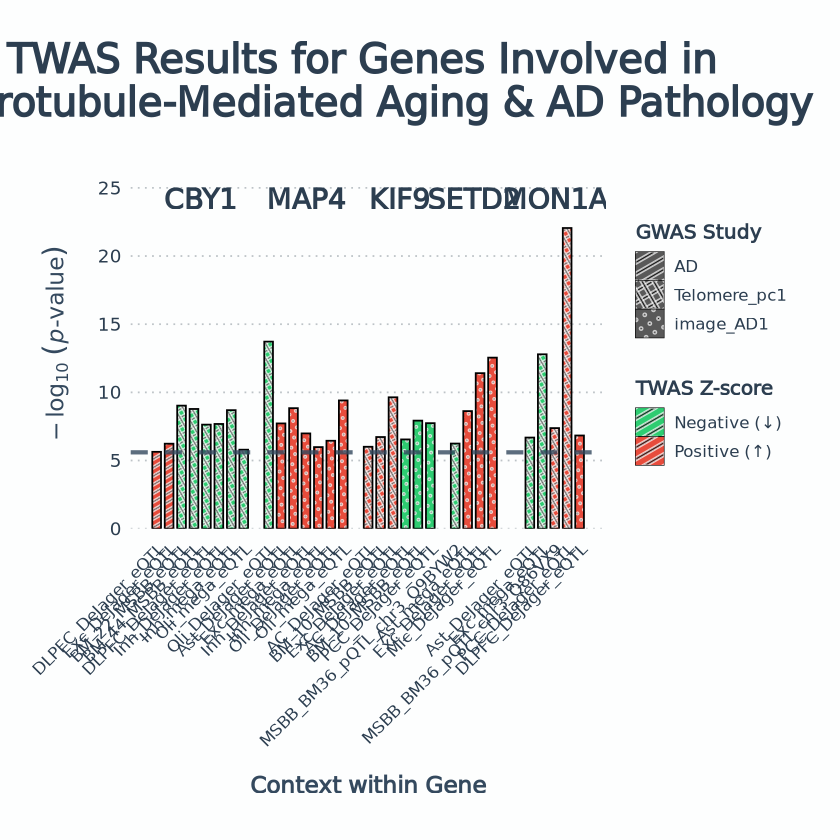

In [62]:
# Modified R code for gene-grouped bar plot
library(ggplot2)
library(ggpattern)

# Create position variable for spacing between genes
# Create position variable for spacing between genes - FIXED VERSION
plot_data_processed <- plot_data %>%
  arrange(gene_name, gwas_study, context) %>%     # Arrange FIRST
  group_by(gene_name) %>%
  mutate(context_within_gene = row_number()) %>%  # Then number the rows
  ungroup()

# Calculate counts for each gene
cby1_count <- sum(plot_data_processed$gene_name == "CBY1")
kif9_count <- sum(plot_data_processed$gene_name == "KIF9")
map4_count <- sum(plot_data_processed$gene_name == "MAP4")
setd2_count <- sum(plot_data_processed$gene_name == "SETD2")
mon1a_count <- sum(plot_data_processed$gene_name == "MON1A")
# Calculate x_pos with spacing between genes
plot_data_processed <- plot_data_processed %>%
  mutate(x_pos = case_when(
    gene_name == "CBY1" ~ context_within_gene,
    gene_name == "MAP4" ~ context_within_gene + cby1_count + 1,
    gene_name == "KIF9" ~ context_within_gene + cby1_count + map4_count + 2,
    gene_name == "SETD2" ~ context_within_gene + cby1_count + map4_count + kif9_count + 3,
    gene_name == "MON1A" ~ context_within_gene + cby1_count + map4_count + kif9_count + mon1a_count + 4,
    TRUE ~ NA_real_  # fallback for any unexpected gene names
  ))

# Create the plot with proper spacing
p_gene_grouped_cilia <- plot_data_processed %>%
  ggplot(aes(x = x_pos, y = neg_log_twas_pval)) +
  
  # Patterned bars with correct pattern mapping
  geom_bar_pattern(
    aes(fill = twas_z_sign, pattern = gwas_study),
    stat = "identity", 
    width = 0.7,
    colour = "black",
    size = 0.5,
    pattern_density = 0.3,
    pattern_spacing = 0.02,
    pattern_colour = "white",
    pattern_fill = "black",
    pattern_alpha = 0.7
  ) +
  
  # Threshold line at y = 0.05
  geom_hline(yintercept = 5.6, 
             linetype = "dashed", 
             color = "#34495E", 
             size = 1.2, 
             alpha = 0.8) +
  
  # Color scheme
  scale_fill_manual(
    values = c("Positive" = "#E74C3C", "Negative" = "#2ECC71"),
    name = "TWAS Z-score",
    labels = c("Negative" = "Negative (↓)", "Positive" = "Positive (↑)")
  ) +
  
  # Pattern scale for different GWAS studies - ensure all study values are included
  scale_pattern_manual(
    values = setNames(c("stripe", "crosshatch", "circle", "none")[1:length(unique(plot_data_processed$gwas_study))],
                      unique(plot_data_processed$gwas_study)),
    name = "GWAS Study"
  ) +
  
  # Custom x-axis with proper spacing and labels
  scale_x_continuous(
    breaks = plot_data_processed$x_pos,
    labels = plot_data_processed$context,
    expand = expansion(mult = c(0.05, 0.05))
  ) +
  
  # Y-axis
  scale_y_continuous(
    expand = expansion(mult = c(0, 0.12)),
    breaks = scales::pretty_breaks(n = 6)
  ) +
  
  # Labels
  labs(
    title = "TWAS Results for Genes Involved in \nmicrotubule-Mediated Aging & AD Pathology",
    x = "Context within Gene",
    y = bquote(-log[10]~(italic(p)*"-value"))
    # caption = "Grouped by gene • Bar colors: TWAS Z-score direction • Patterns: GWAS study • Dashed line: p = 0.05"
  ) +
  
  # Add gene group labels
  annotate("text", 
           x = mean(plot_data_processed$x_pos[plot_data_processed$gene_name == "CBY1"]),
           y = max(plot_data_processed$neg_log_twas_pval) * 1.1,
           label = "CBY1", 
           size = 6, 
           fontface = "bold",
           color = "#2C3E50") +

  annotate("text", 
           x = mean(plot_data_processed$x_pos[plot_data_processed$gene_name == "MAP4"]),
           y = max(plot_data_processed$neg_log_twas_pval) * 1.1,
           label = "MAP4", 
           size = 6, 
           fontface = "bold",
           color = "#2C3E50") +


  annotate("text", 
           x = mean(plot_data_processed$x_pos[plot_data_processed$gene_name == "KIF9"]),
           y = max(plot_data_processed$neg_log_twas_pval) * 1.1,
           label = "KIF9", 
           size = 6, 
           fontface = "bold",
           color = "#2C3E50") +
  
  annotate("text", 
           x = mean(plot_data_processed$x_pos[plot_data_processed$gene_name == "SETD2"]),
           y = max(plot_data_processed$neg_log_twas_pval) * 1.1,
           label = "SETD2", 
           size = 6, 
           fontface = "bold",
           color = "#2C3E50") +

  annotate("text", 
           x = mean(plot_data_processed$x_pos[plot_data_processed$gene_name == "MON1A"]),
           y = max(plot_data_processed$neg_log_twas_pval) * 1.1,
           label = "MON1A", 
           size = 6, 
           fontface = "bold",
           color = "#2C3E50") +

  # Theme with increased plot width
  theme_minimal(base_size = 12) +
  theme(
    plot.title = element_text(size = 24, face = "bold", hjust = 0.5, color = "#2C3E50", margin = margin(b = 20)),
    axis.title.x = element_text(size = 14, face = "bold", color = "#34495E", margin = margin(t = 15)),
    axis.title.y = element_text(size = 14, face = "bold", color = "#34495E", margin = margin(r = 15)),
    axis.text.x = element_text(angle = 45, hjust = 1, size = 10, color = "#2C3E50", margin = margin(t = 5)),
    axis.text.y = element_text(size = 11, color = "#2C3E50"),
    legend.position = "right",
    legend.title = element_text(face = "bold", size = 12, color = "#2C3E50"),
    legend.text = element_text(size = 10, color = "#2C3E50"),
    legend.box = "vertical",
    panel.grid.major.y = element_line(color = "#BDC3C7", size = 0.5, linetype = "dotted"),
    panel.grid.minor = element_blank(),
    panel.grid.major.x = element_blank(),
    panel.background = element_rect(fill = "#FDFEFE", color = NA),
    plot.background = element_rect(fill = "#FDFEFE", color = NA),
    plot.caption = element_text(size = 10, color = "#7F8C8D", hjust = 0.5, margin = margin(t = 15)),
    plot.margin = margin(25, 25, 25, 25)
  )

# Display the plot with increased width
print(p_gene_grouped_cilia)

In [63]:
ggsave("TL1_AD1_twas.png", p_gene_grouped_cilia, width = 15, height = 8, dpi = 300)


In [5]:
MON1A = fread("~/twas/PD/twas/PD_ROSMAP_eQTL_pQTL.chr3_47545024_52179438.twas.tsv.gz")
head(MON1A)

chr,molecular_id,TSS,start,end,context,gwas_study,method,is_imputable,is_selected_method,rsq_cv,pval_cv,twas_z,twas_pval,type,block
<int>,<chr>,<int>,<int>,<int>,<chr>,<chr>,<chr>,<lgl>,<lgl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
3,ENSG00000003756,50088918,46680000,51119021,OPC_DeJager_eQTL,PD,bayes_l,TRUE,FALSE,5.320439e-03,0.07300417,-2.168569,0.03011539,eQTL,chr3_47545024_52179438
3,ENSG00000003756,50088918,46680000,51119021,OPC_DeJager_eQTL,PD,bayes_r,TRUE,FALSE,2.577772e-03,0.15021668,-2.116990,0.03426066,eQTL,chr3_47545024_52179438
3,ENSG00000003756,50088918,46680000,51119021,OPC_DeJager_eQTL,PD,enet,TRUE,FALSE,2.752461e-03,0.14323778,-2.337244,0.01942651,eQTL,chr3_47545024_52179438
3,ENSG00000003756,50088918,46680000,51119021,OPC_DeJager_eQTL,PD,lasso,TRUE,TRUE,2.010636e-02,0.00212657,NA,NA,eQTL,chr3_47545024_52179438
3,ENSG00000003756,50088918,46680000,51119021,OPC_DeJager_eQTL,PD,mrash,TRUE,FALSE,-5.683165e-05,0.32368770,-1.521102,0.12823414,eQTL,chr3_47545024_52179438
3,ENSG00000003756,50088918,46680000,51119021,OPC_DeJager_eQTL,PD,susie,TRUE,FALSE,8.107353e-04,0.24798886,-1.291580,0.19650259,eQTL,chr3_47545024_52179438


In [6]:
MON1A |> filter(molecular_id == "ENSG00000164077")

chr,molecular_id,TSS,start,end,context,gwas_study,method,is_imputable,is_selected_method,rsq_cv,pval_cv,twas_z,twas_pval,type,block
<int>,<chr>,<int>,<int>,<int>,<chr>,<chr>,<chr>,<lgl>,<lgl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
3,ENSG00000164077,49930172,46680000,50930173,Ast_DeJager_eQTL,PD,bayes_l,TRUE,FALSE,-0.0011279582,4.674169e-01,2.1792448,0.02931349,eQTL,chr3_47545024_52179438
3,ENSG00000164077,49930172,46680000,50930173,Ast_DeJager_eQTL,PD,bayes_r,TRUE,FALSE,0.0001086653,3.071554e-01,1.7005227,0.08903265,eQTL,chr3_47545024_52179438
3,ENSG00000164077,49930172,46680000,50930173,Ast_DeJager_eQTL,PD,enet,TRUE,FALSE,-0.0019895694,6.803137e-01,0.2025420,0.83949305,eQTL,chr3_47545024_52179438
3,ENSG00000164077,49930172,46680000,50930173,Ast_DeJager_eQTL,PD,lasso,TRUE,FALSE,-0.0007003522,4.007712e-01,0.6469728,0.51764957,eQTL,chr3_47545024_52179438
3,ENSG00000164077,49930172,46680000,50930173,Ast_DeJager_eQTL,PD,mrash,TRUE,FALSE,0.0097023998,2.450691e-02,1.4610728,0.14399546,eQTL,chr3_47545024_52179438
3,ENSG00000164077,49930172,46680000,50930173,Ast_DeJager_eQTL,PD,susie,TRUE,TRUE,0.0106883314,1.930949e-02,NA,NA,eQTL,chr3_47545024_52179438
3,ENSG00000164077,49930172,46680000,50930173,DLPFC_DeJager_eQTL,PD,bayes_l,TRUE,FALSE,0.0221822070,1.673120e-05,-1.0993884,0.27159871,eQTL,chr3_47545024_52179438
3,ENSG00000164077,49930172,46680000,50930173,DLPFC_DeJager_eQTL,PD,bayes_r,TRUE,FALSE,0.0208942113,2.872207e-05,-1.0752733,0.28225239,eQTL,chr3_47545024_52179438
3,ENSG00000164077,49930172,46680000,50930173,DLPFC_DeJager_eQTL,PD,enet,TRUE,FALSE,0.0123236285,1.077463e-03,-1.1941061,0.23243645,eQTL,chr3_47545024_52179438


In [34]:
TL1_Aging3_genes = annotated_all |> filter(gene_name %in% c("DNAJC5", "TRIM26", "USP19", "GGT7"), twas_pval < 2.5* 1e-6, is_selected_method)

In [35]:
TL1_Aging3_genes |> arrange(gene_name, gwas_study, context)

chr,molecular_id,gene_name,context,gwas_study,twas_z,twas_pval,start,end,method,is_imputable,is_selected_method,rsq_cv,pval_cv,type,block
<int>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<int>,<int>,<chr>,<lgl>,<lgl>,<dbl>,<dbl>,<chr>,<chr>
20,ENSG00000101152,DNAJC5,BM_36_MSBB_eQTL,Telomere_pc1,6.593224,4.303762e-11,59520000,64444167,mrash,TRUE,TRUE,0.01833438,2.251629e-02,eQTL,chr20_63558301_64331539
20,ENSG00000101152,DNAJC5,Exc_mega_eQTL,Telomere_pc1,-9.603149,7.753826e-22,59520000,64444167,lasso,TRUE,TRUE,0.02331462,1.861451e-05,eQTL,chr20_63558301_64331539
20,ENSG00000101152,DNAJC5,Oli_DeJager_eQTL,Telomere_pc1,-8.145739,3.769716e-16,59520000,64444167,susie,TRUE,TRUE,0.03211108,1.335244e-04,eQTL,chr20_63558301_64331539
20,ENSG00000101152,DNAJC5,Oli_mega_eQTL,Telomere_pc1,-7.535256,4.873788e-14,59520000,64444167,susie,TRUE,TRUE,0.07565036,1.764788e-14,eQTL,chr20_63558301_64331539
20,ENSG00000131067,GGT7,Exc_DeJager_eQTL,Telomere_pc1,-5.568842,2.564384e-08,33844720,37080000,mvsusie,TRUE,TRUE,0.08555614,6.225591e-10,eQTL,chr20_32060775_36429279
20,ENSG00000131067,GGT7,Exc_mega_eQTL,Telomere_pc1,-7.645561,2.080362e-14,33844720,37080000,mrash,TRUE,TRUE,0.05848544,1.722036e-11,eQTL,chr20_32060775_36429279
20,ENSG00000131067,GGT7,Inh_DeJager_eQTL,Telomere_pc1,-5.555574,2.767014e-08,33844720,37080000,mvsusie,TRUE,TRUE,0.04609064,5.510982e-06,eQTL,chr20_32060775_36429279
20,ENSG00000131067,GGT7,Mic_DeJager_eQTL,Telomere_pc1,-4.964549,6.886106e-07,33844720,37080000,bayes_l,TRUE,TRUE,0.03406585,8.546410e-05,eQTL,chr20_32060775_36429279
20,ENSG00000131067,GGT7,monocyte_ROSMAP_eQTL,Telomere_pc1,-5.573252,2.500279e-08,33844720,37080000,mvsusie,TRUE,TRUE,0.08428418,5.442332e-06,eQTL,chr20_32060775_36429279


In [40]:
# annotated_all |> filter(gene_name %in% c("DNAJC5", "TRIM26", "USP19", "GGT7"), twas_pval < 2.5* 1e-6) |> group_by(gene_name,gwas_study,context) |> 
#   slice_min(twas_pval, n = 1, with_ties = FALSE) |> arrange(gene_name, gwas_study, context) 

In [44]:
plot_data <- TL1_Aging3_genes %>%
    mutate(
      # Calculate -log10(bonferroni p-value)
      neg_log_twas_pval = -log10(twas_pval),
      # Create color factor based on twas_z sign
      twas_z_sign = ifelse(twas_z < 0, "Negative", "Positive"),
      # Clean up context names for better display (optional)
      context = str_replace(context, 
                               "^(.+?_sQTL)[^:]*:.*:(clu_\\d+_\\+):([A-Z]+):.*$", 
                               "\\1:\\2:\\3"),
      gwas_study = ifelse(grepl("Jansen|Bellenguez|Wightman", gwas_study), "AD", gwas_study))
plot_data |> arrange(gene_name, gwas_study, context)

chr,molecular_id,gene_name,context,gwas_study,twas_z,twas_pval,start,end,method,is_imputable,is_selected_method,rsq_cv,pval_cv,type,block,neg_log_twas_pval,twas_z_sign
<int>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<int>,<int>,<chr>,<lgl>,<lgl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<chr>
20,ENSG00000101152,DNAJC5,BM_36_MSBB_eQTL,Telomere_pc1,6.593224,4.303762e-11,59520000,64444167,mrash,TRUE,TRUE,0.01833438,2.251629e-02,eQTL,chr20_63558301_64331539,10.366152,Positive
20,ENSG00000101152,DNAJC5,Exc_mega_eQTL,Telomere_pc1,-9.603149,7.753826e-22,59520000,64444167,lasso,TRUE,TRUE,0.02331462,1.861451e-05,eQTL,chr20_63558301_64331539,21.110484,Negative
20,ENSG00000101152,DNAJC5,Oli_DeJager_eQTL,Telomere_pc1,-8.145739,3.769716e-16,59520000,64444167,susie,TRUE,TRUE,0.03211108,1.335244e-04,eQTL,chr20_63558301_64331539,15.423691,Negative
20,ENSG00000101152,DNAJC5,Oli_mega_eQTL,Telomere_pc1,-7.535256,4.873788e-14,59520000,64444167,susie,TRUE,TRUE,0.07565036,1.764788e-14,eQTL,chr20_63558301_64331539,13.312133,Negative
20,ENSG00000131067,GGT7,Exc_DeJager_eQTL,Telomere_pc1,-5.568842,2.564384e-08,33844720,37080000,mvsusie,TRUE,TRUE,0.08555614,6.225591e-10,eQTL,chr20_32060775_36429279,7.591017,Negative
20,ENSG00000131067,GGT7,Exc_mega_eQTL,Telomere_pc1,-7.645561,2.080362e-14,33844720,37080000,mrash,TRUE,TRUE,0.05848544,1.722036e-11,eQTL,chr20_32060775_36429279,13.681861,Negative
20,ENSG00000131067,GGT7,Inh_DeJager_eQTL,Telomere_pc1,-5.555574,2.767014e-08,33844720,37080000,mvsusie,TRUE,TRUE,0.04609064,5.510982e-06,eQTL,chr20_32060775_36429279,7.557989,Negative
20,ENSG00000131067,GGT7,Mic_DeJager_eQTL,Telomere_pc1,-4.964549,6.886106e-07,33844720,37080000,bayes_l,TRUE,TRUE,0.03406585,8.546410e-05,eQTL,chr20_32060775_36429279,6.162026,Negative
20,ENSG00000131067,GGT7,monocyte_ROSMAP_eQTL,Telomere_pc1,-5.573252,2.500279e-08,33844720,37080000,mvsusie,TRUE,TRUE,0.08428418,5.442332e-06,eQTL,chr20_32060775_36429279,7.602012,Negative


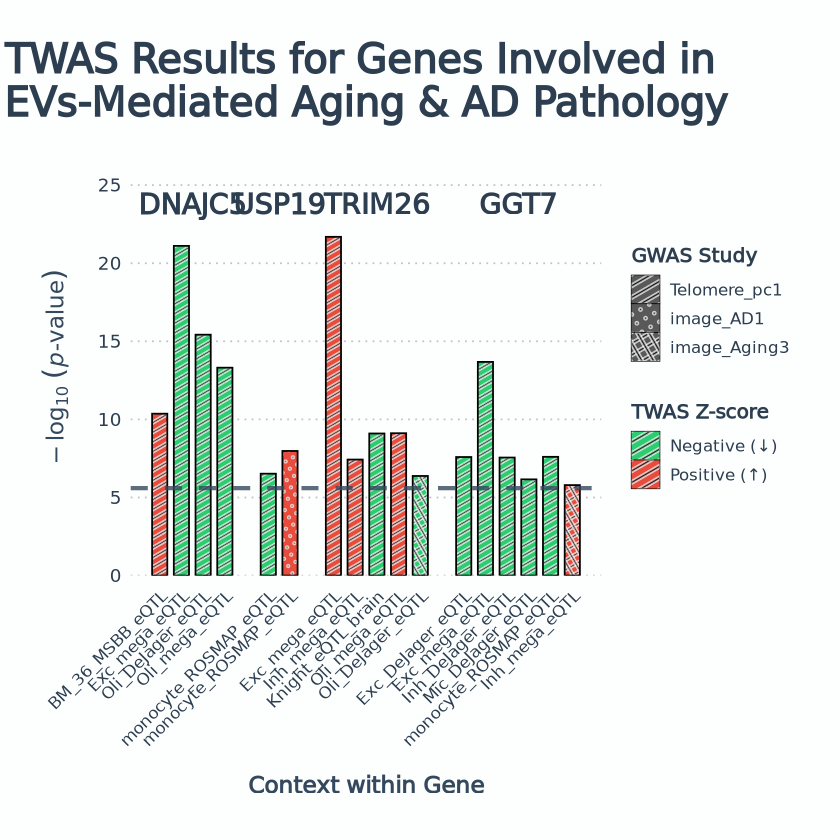

In [48]:
# Modified R code for gene-grouped bar plot
library(ggplot2)
library(ggpattern)

# Create position variable for spacing between genes
# Create position variable for spacing between genes - FIXED VERSION
plot_data_processed <- plot_data %>%
  arrange(gene_name, gwas_study, context) %>%     # Arrange FIRST
  group_by(gene_name) %>%
  mutate(context_within_gene = row_number()) %>%  # Then number the rows
  ungroup()

# Calculate counts for each gene
dnajc5_count <- sum(plot_data_processed$gene_name == "DNAJC5")
usp19_count <- sum(plot_data_processed$gene_name == "USP19")
trim26_count <- sum(plot_data_processed$gene_name == "TRIM26")
ggt7_count <- sum(plot_data_processed$gene_name == "GGT7")

# Calculate x_pos with spacing between genes
plot_data_processed <- plot_data_processed %>%
  mutate(x_pos = case_when(
    gene_name == "DNAJC5" ~ context_within_gene,
    gene_name == "USP19" ~ context_within_gene + dnajc5_count + 1,
    gene_name == "TRIM26" ~ context_within_gene + dnajc5_count + usp19_count + 2,
    gene_name == "GGT7" ~ context_within_gene + dnajc5_count + usp19_count + trim26_count + 3,
    TRUE ~ NA_real_  # fallback for any unexpected gene names
  ))

# Create the plot with proper spacing
p_gene_EV <- plot_data_processed %>%
  ggplot(aes(x = x_pos, y = neg_log_twas_pval)) +
  
  # Patterned bars with correct pattern mapping
  geom_bar_pattern(
    aes(fill = twas_z_sign, pattern = gwas_study),
    stat = "identity", 
    width = 0.7,
    colour = "black",
    size = 0.5,
    pattern_density = 0.3,
    pattern_spacing = 0.02,
    pattern_colour = "white",
    pattern_fill = "black",
    pattern_alpha = 0.7
  ) +
  
  # Threshold line at y = 0.05
  geom_hline(yintercept = 5.6, 
             linetype = "dashed", 
             color = "#34495E", 
             size = 1.2, 
             alpha = 0.8) +
  
  # Color scheme
  scale_fill_manual(
    values = c("Positive" = "#E74C3C", "Negative" = "#2ECC71"),
    name = "TWAS Z-score",
    labels = c("Negative" = "Negative (↓)", "Positive" = "Positive (↑)")
  ) +
  
  # Pattern scale for different GWAS studies - ensure all study values are included
  scale_pattern_manual(
    values = setNames(c("stripe", "crosshatch", "circle", "none")[1:length(unique(plot_data_processed$gwas_study))],
                      unique(plot_data_processed$gwas_study)),
    name = "GWAS Study"
  ) +
  
  # Custom x-axis with proper spacing and labels
  scale_x_continuous(
    breaks = plot_data_processed$x_pos,
    labels = plot_data_processed$context,
    expand = expansion(mult = c(0.05, 0.05))
  ) +
  
  # Y-axis
  scale_y_continuous(
    expand = expansion(mult = c(0, 0.12)),
    breaks = scales::pretty_breaks(n = 6)
  ) +
  
  # Labels
  labs(
    title = "TWAS Results for Genes Involved in \nEVs-Mediated Aging & AD Pathology",
    x = "Context within Gene",
    y = bquote(-log[10]~(italic(p)*"-value"))
    # caption = "Grouped by gene • Bar colors: TWAS Z-score direction • Patterns: GWAS study • Dashed line: p = 0.05"
  ) +
  
  # Add gene group labels
  annotate("text", 
           x = mean(plot_data_processed$x_pos[plot_data_processed$gene_name == "DNAJC5"]),
           y = max(plot_data_processed$neg_log_twas_pval) * 1.1,
           label = "DNAJC5", 
           size = 6, 
           fontface = "bold",
           color = "#2C3E50") +

  annotate("text", 
           x = mean(plot_data_processed$x_pos[plot_data_processed$gene_name == "USP19"]),
           y = max(plot_data_processed$neg_log_twas_pval) * 1.1,
           label = "USP19", 
           size = 6, 
           fontface = "bold",
           color = "#2C3E50") +


  annotate("text", 
           x = mean(plot_data_processed$x_pos[plot_data_processed$gene_name == "TRIM26"]),
           y = max(plot_data_processed$neg_log_twas_pval) * 1.1,
           label = "TRIM26", 
           size = 6, 
           fontface = "bold",
           color = "#2C3E50") +
  
  annotate("text", 
           x = mean(plot_data_processed$x_pos[plot_data_processed$gene_name == "GGT7"]),
           y = max(plot_data_processed$neg_log_twas_pval) * 1.1,
           label = "GGT7", 
           size = 6, 
           fontface = "bold",
           color = "#2C3E50") +

  # Theme with increased plot width
  theme_minimal(base_size = 12) +
  theme(
    plot.title = element_text(size = 24, face = "bold", hjust = 0.5, color = "#2C3E50", margin = margin(b = 20)),
    axis.title.x = element_text(size = 14, face = "bold", color = "#34495E", margin = margin(t = 15)),
    axis.title.y = element_text(size = 14, face = "bold", color = "#34495E", margin = margin(r = 15)),
    axis.text.x = element_text(angle = 45, hjust = 1, size = 10, color = "#2C3E50", margin = margin(t = 5)),
    axis.text.y = element_text(size = 11, color = "#2C3E50"),
    legend.position = "right",
    legend.title = element_text(face = "bold", size = 12, color = "#2C3E50"),
    legend.text = element_text(size = 10, color = "#2C3E50"),
    legend.box = "vertical",
    panel.grid.major.y = element_line(color = "#BDC3C7", size = 0.5, linetype = "dotted"),
    panel.grid.minor = element_blank(),
    panel.grid.major.x = element_blank(),
    panel.background = element_rect(fill = "#FDFEFE", color = NA),
    plot.background = element_rect(fill = "#FDFEFE", color = NA),
    plot.caption = element_text(size = 10, color = "#7F8C8D", hjust = 0.5, margin = margin(t = 15)),
    plot.margin = margin(25, 25, 25, 25)
  )

# Display the plot with increased width
print(p_gene_EV)

In [49]:
ggsave("TL1_Aging3_twas.png", p_gene_EV, width = 10, height = 8, dpi = 300)
